<!-- Portada -->
<div style="display: flex; justify-content: center; align-items: center; height: 100vh; font-family: Arial, sans-serif; background-color: #f4f4f4; text-align: center;">
    <div style="background: white; padding: 50px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2); width: 70%; max-width: 800px;">
        <h1 style="font-size: 32px; margin-bottom: 20px; color: #333;">Predicción de color LAB para máquinas industriales</h1>
        <h2 style="color: #555;">Máster en Inteligencia Artificial</h2>
        <h3 style="color: #555;">Universidad Complutense de Madrid</h3>
        <h4 style="color: #555;">Fecha: <script>document.write(new Date().toLocaleDateString());</script></h4>
        <h4 style="color: #555;">Alumno: <strong>Jaume Poch Blanch</strong></h4>
    </div>
</div>



# **Índice**  

## 📌 [1. Introducción](#introduccion)  
   - [Objetivo del proyecto](#objetivodelproyecto)  
   - [Contexto industrial](#contextoindustrial)  
   - [Problema actual en la impresión sobre plástico](#problemaactual)  
   - [Propuesta de valor](#propuestadevalor)  

## 📌 [2. Estudio del problema con el equipo](#estudiodelproblemaconelequipo)  

## 📌 [3. Datos](#datos)  
   - [Obtención de datos](#obtenciondedatos)  
       - [Incorporación y descarte de datos meteorológicos](#incorporacionydescartededatosmeteorologicos)  
   - [Generación de datos sintéticos](#generaciondedatossinteticos)  
       - [Discretización del tiempo](#discretizaciondeltiempo)  
       - [Generación de la velocidad de la máquina](#generaciondelavelocidaddelamaquina)  
       - [Simulación del color LAB](#simulaciondelcolorlab)  

## 📌 [4. Procesamiento y Transformación de Datos](#procesamientoytransformaciondedatos)  
   - [Enriquecimiento de datos](#enriquecimientodedatos)  
   - [Eliminación de filas no relevantes](#eliminaciondefilasnorelevantes)  

## 📌 [5. Análisis Exploratorio de Datos (EDA)](#analisisexploratoriodedatoseda)  
   - [Variables y distribución de datos](#variablesydistribuciondedatos)  
   - [Eliminación de variables innecesarias](#eliminaciondevariablesinnecesarias)  
   - [Transformaciones de datos](#transformacionesdedatos)  
     - [Escalado y normalización (StandardScaler, RobustScaler)](#escaladoynormalizacion)  
     - [Transformaciones logarítmicas](#transformacioneslogaritmicas)  
     - [Codificación de variables categóricas (One-Hot Encoding)](#codificaciondevariablescategoricas)  
   - [Matriz de correlación](#matrizdecorrelacion)
   - [División en conjuntos de Train/Test/Validación](#divisionentrenuestrosconjuntos)  

## 📌 [6. Modelado](#modelado)  
   - [Definición del Modelado y Selección de Métricas](#definiciondelmodelado)  
     - [Métricas de Evaluación](#metricasdeevaluacion)  
     - [Consideraciones sobre la Arquitectura](#consideracionessobrelasarquitecturas)  
     - [Comparación de Enfoques: RNN vs. Transformers](#comparacionrnntransformers)  
   - [Configuraciones y Parámetros Globales para todos los modelos implementados](#configuracioninicial)  
     - [Importancia del Tamaño de la Ventana](#tamanoventana)  
     - [Reproducibilidad](#reproducibilidad)  
   - [Implementación de Modelos elegidos](#implementaciondemodelos)  
     - [Modelos Basados en RNN (LSTM y GRU)](#rnnbasadosmodelos)  
       - [Optimización y Ajuste de Hiperparámetros](#optimizacionhiperparametros)  
       - [Entrenamiento y Evaluación](#entrenamientoyevaluacionlstmgru)  
     - [Modelos Basados en Transformers](#transformersbasadosmodelos)  

## 📌 [7. Evaluación y Comparación de Modelos](#evaluacionycomparaciondemodelos)  
   - [Métricas de rendimiento](#metricasderendimiento)  
   - [Análisis de predicciones](#analisisdepredicciones)  
   - [Selección del mejor modelo](#selecciondelmejormodelo)  
   - [Reentrenamiento con datos combinados de Train+Validation](#reentrenamientocondatoscombinados)  
   - [Predicciones sobre Test](#predccionessobretest)  

## 📌 [8. Conclusiones y Mejoras Futuras](#conclusionesymejorasfuturas)  
   - [Hallazgos clave](#hallazgosclave)  
   - [Posibles mejoras](#posiblesmejoras)  
     - [Refinamiento de variables categóricas](#refinamientodevariablescategoricas)  
     - [Incorporación de nuevas métricas](#incorporaciondenuevasmetricas)  
     - [Experimentación con otros modelos y arquitecturas](#experimentacionconotrosmodelosyarquitecturas)  

## 📌 [9. Bibliografía y Recursos](#bibliografiayrecursos)  
   - [Normativa y estándares de color LAB](#normativayestandaresdecolorlab)  
   - [Documentación técnica y referencias utilizadas](#documentaciontecnica)  

## 📌 [10. Anexos](#anexos)  
   - [Lista de páginas web consultadas](#listapaginaweb)  
   - [Explicación adicional sobre color LAB](#explicacioncolorlab)  
   - [Ejemplo de dataset sintético generado](#ejemplodatasetsintetico)  
   - [Código fuente del preprocesamiento](#codigofuentepreprocesamiento)  
   - [Resultados adicionales de modelos](#resultadosadicionales)  


---

<!-- Sección 1: Introducción -->
<a name="introduccion"></a>
# **1. Introducción**  

<a name="objetivodelproyecto"></a>
## 📌 **Objetivo del proyecto**  

Este proyecto tiene como finalidad desarrollar un modelo de predicción de color para máquinas industriales de impresión sobre plástico.

<a name="contextoindustrial"></a>
## 📌 **Contexto industrial**  

La empresa para la que se desarrolla este proyecto se especializa en la venta de componentes para estas máquinas, en particular cámaras que capturan diferentes partes de la impresión y las transforman en valores del espacio de color **CIELAB**. Estos valores se comparan con el color requerido por el cliente y, si exceden ciertos umbrales de tolerancia, generan una alarma para ajustar el color y mantenerlo dentro de los parámetros aceptables.

Las mediciones de color se almacenan en un archivo XML bajo el estándar industrial **ISO 17972-1:2015**.

<a name="problemaactual"></a>
## 📌 **Problema actual en la impresión sobre plástico**  

Los principales desafíos que enfrenta el sistema actual son:

- **Ubicación de las cámaras:** Las máquinas industriales poseen diversas configuraciones, lo que implica que las cámaras de visión se sitúan en diferentes posiciones y distancias respecto a los inyectores de color.
- **Sistema reactivo en lugar de predictivo:** Actualmente, los ajustes de color solo ocurren tras detectar una desviación, lo que genera desperdicio de material.
- **Reducción de la merma:** Los errores de impresión generan desechos de plástico innecesarios.
- **Pérdida de productividad:** Las intervenciones manuales para reajustar los colores interrumpen la producción.

<a name="propuestadevalor"></a>
## 📌 **Propuesta de valor**  

Para abordar estos problemas, se busca desarrollar un modelo que pueda **predecir los valores LAB con antelación**, permitiendo intervenir antes de que el color se salga de los umbrales permitidos. Esto proporcionaría varios beneficios:

- **Reducción de la merma:** Al anticipar los fallos, se minimizaría la cantidad de material desechado.
- **Mayor eficiencia y sostenibilidad:** Se reduciría el impacto ambiental al disminuir el desperdicio de plástico.
- **Automatización del ajuste de color:** En caso de una predicción precisa, se podría implementar un sistema que ajuste los inyectores automáticamente, eliminando la necesidad de intervención humana y mejorando la productividad.

---

<!-- Sección 2: Estudio del problema con el equipo -->
<a name="estudiodelproblemaconelequipo"></a>
# **2. Estudio del problema con el equipo**

Tras un proceso intensivo de reuniones y consultas con los expertos de la empresa, se han identificado y analizado los factores clave que influyen en la variación del color durante la impresión sobre plástico. Estos hallazgos permiten definir, por un lado, los retos que se deben abordar en el desarrollo del modelo predictivo y, por otro, las conclusiones que fundamentan el enfoque propuesto. A continuación, se resumen los puntos más relevantes:

- **Velocidad de la máquina:**
  - *Parada:* No hay producción ni movimiento, lo que permite evaluar el comportamiento del sistema en inactividad.
  - *Puesta a punto:* Durante la fase de ajuste de parámetros y pruebas de impresión, con velocidades entre 10 y 50 m/min.
  - *Velocidad normal:* Operación en condiciones de producción estable (300-350 m/min), donde se espera obtener resultados consistentes.
  - *Velocidad máxima:* En escenarios de alta producción (alrededor de 500 m/min), donde la precisión puede verse comprometida.

- **Medición del color LAB:**  
  Se utilizan cámaras que capturan los valores del espacio **CIELAB** conforme al estándar definido. El equipo nos proporciona un fichero tipo en formato XML, que recoge las lecturas de los valores por el sistema de visión, permitiendo así una integración precisa de los datos en el modelo.

- **Condiciones ambientales (Humedad y Temperatura):**  
  Aunque se reconocen como variables potencialmente influyentes, se decidió no incorporarlas en el modelo debido a la ausencia de sensores adecuados para su medición precisa.

- **Patrones de impresión:**  
  La diversidad de diseños y patrones impresos por cada cliente se refleja en las variaciones de los valores LAB, lo que añade complejidad al análisis pero también ofrece información valiosa para la predicción.

- **Tipo de plástico:**  
  A pesar de su impacto en el proceso de impresión, se ha optado por descartar este factor en el modelado sintético, debido a la alta complejidad que implica su correcta simulación.

---

<!-- Sección 3: Datos -->
<a name="datos"></a>
# **3. Datos**

<a name="obtenciondedatos"></a>
## 📌 **Obtención de datos**

<a name="incorporacionydescartededatosmeteorologicos"></a>
### **Incorporación y descarte de datos meteorológicos**

Inicialmente se consideró incorporar datos de humedad y temperatura ambiente de un sitio concreto para luego usarlos en la generación de lecturas de color. Estos datos se obtuvieron de [AEMET](https://www.aemet.es/) y se documentó el proceso en el notebook **"01_DatosMeteorologicos.ipynb"** (disponible en el anexo).  

Durante el proceso se detectaron valores anómalos y nulos, por lo que se realizó una limpieza y posterior imputación de datos en el dataset. Sin embargo, tras analizar la complejidad de extrapolar datos horarios (ya que AEMET ofrece mediciones diarias) y la ausencia de sensores en las máquinas actuales, se concluyó que su incorporación para la generación de datos sintéticos resultaba inviable. Por ello, aunque estos datos se integran inicialmente en el dataframe, se opta por descartarlos en el modelo final.

<a name="generaciondedatossinteticos"></a>
## 📌 **Generación de datos sintéticos**

Se parte de un dataframe base (inicialmente enriquecido con datos meteorológicos) para generar dos tipos de datos fundamentales: la **velocidad de la máquina** y los **valores de color LAB**. El proceso se divide en tres pasos:

<a name="discretizaciondeltiempo"></a>
### **Discretización del tiempo**

Dado que el dataframe original contiene datos diarios, es necesario incrementar la granularidad temporal para obtener lecturas en intervalos más cortos. Para ello se utiliza la función `cortar_y_interpolar_dataset` (que se apoya en `dividir_dia_en_intervalos`), la cual, a partir de una fecha de inicio, fecha de fin y un número de intervalos por día, genera un nuevo dataframe con los registros distribuidos a lo largo del día.  
*Consulta el apartado "Discretizador de tiempo" en el notebook **"02_generador_datos_sinteticos.ipynb"** para más detalles.*

<a name="generaciondelavelocidaddelamaquina"></a>
### **Generación de la velocidad de la máquina**

En este paso se simula el comportamiento de la máquina determinando una serie de velocidades que representen distintos estados de operación:
  
1. **Determinación de estados:**  
   Se define si durante el día (o turno) ocurrirán paradas (por avería, cambio de diseño o paradas planificadas), si habrá puestas a punto o producción, asignando probabilidades (por ejemplo, un 5% para averías y un 30% para cambios de diseño).

2. **Asignación de duración:**  
   Se calcula cuántos intervalos o minutos se asignan a cada estado, considerando:
   - Paradas (en caso de ocurrir).  
   - Puestas a punto (máximo 10% del día, en tramos de 10 a 60 minutos).  
   - Producción: dentro de la producción, se selecciona “Normal” (70%) o “Alta” (30%).

3. **Secuenciación y generación:**  
   Se secuencia el comportamiento de la máquina respetando las reglas de transición (por ejemplo, de Parada a Puesta a punto y luego a producción) y se asigna una velocidad base para cada estado. A esta velocidad se le aplican:
   - Aceleración/desaceleración en los cambios de estado.  
   - Variaciones internas en puestas a punto.  
   - Ruido fortuito (aproximadamente 1% por intervalo activo) para simular fluctuaciones.

*Consulta la sección "Generador de la velocidad de la máquina" en el notebook **"02_generador_datos_sinteticos.ipynb"** para una explicación detallada del proceso.*

---

<a name="simulaciondelcolorlab"></a>
### **Simulación del color LAB**

Para simular el color impreso se utiliza el espacio de color **LAB**, considerando los siguientes rangos:
  
- \(L\) entre 0 y 100,  
- \(A\) aproximadamente entre -128 y +127,  
- \(B\) aproximadamente entre -128 y +127.

El proceso de simulación parte de un **color base** (definido por el estado de la máquina y el patrón de impresión) y se ve afectado por diversos factores:

1. **Aceleración/Desaceleración:**  
   Los cambios bruscos de velocidad pueden generar desajustes temporales en el color, simulados como picos o desviaciones.

2. **Deriva por tiempo prolongado:**  
   Si la máquina permanece en un mismo estado (por ejemplo, producción normal o alta) durante períodos prolongados, el color se desvía gradualmente por efectos de desgaste o saturación. En cambio, al entrar en “puesta a punto” se reajusta el color.

3. **Ruido aleatorio:**  
   Se añade variabilidad para reflejar la imprecisión del sensor y pequeñas fluctuaciones reales en los valores de \(L\), \(A\) y \(B\).

Las funciones clave que implementan esta simulación son:
  
- **`_obtener_lab_base`:** Inicializa los valores de **L, A y B** según el estado.  
- **`_aplicar_aceleracion_desaceleracion`:** Ajusta los valores en función de los cambios bruscos de velocidad.  
- **`_aplicar_deriva_tiempo`:** Simula la deriva gradual del color cuando se mantiene un estado por períodos largos.  
- **`calcular_color_lab`:** Función principal que integra la lógica de las anteriores.

*Revisa el apartado "Función principal para el cálculo de color `calcular_color_lab`" en el notebook **"02_generador_datos_sinteticos.ipynb"** para más información sobre este proceso.*

---

### **Representación gráfica de la simulación**

Esta es la representación gráfica de los datos con los que trabajaré:

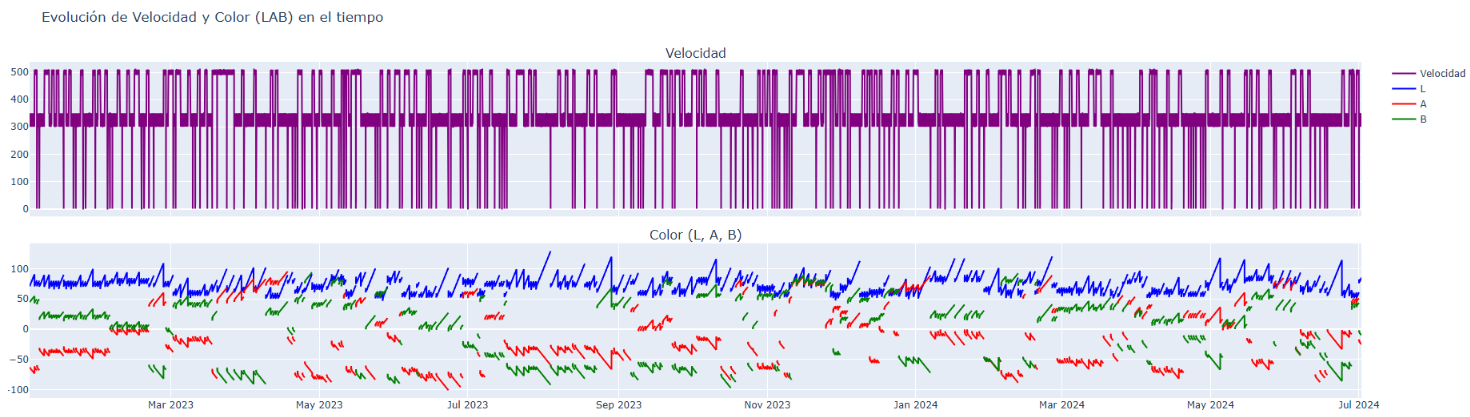

Cada ejecución del notebook **"02_generador_datos_sinteticos.ipynb"** genera gráficos interactivos (utilizando la librería *plotly*) que ilustran la evolución de la velocidad y del color a lo largo del tiempo. Estos gráficos, que se abren en una ventana separada para permitir zoom y exploración detallada, muestran la variabilidad y el comportamiento de la máquina, simulando diferentes escenarios de operación.

> **NOTA IMPORTANTE:** Para poder obtener los mismos resultados, se han anexado los ficheros generados en una ejecución en los archivos adjuntos ("02_datos_limpios - BCK_ENTREGA.pkl" y "02_datos_limpios_sin_parada - BCK_ENTREGA.pkl"). De esta forma, se puede reproducir el experimento, ya que al volver a ejecutar el notebook, los datos generados serán diferentes.

*Consulta el notebook **"02_generador_datos_sinteticos.ipynb"** para ver ejemplos y explicaciones completas de la generación de estos gráficos.*

---

<!-- Sección 4: Procesamiento y Transformación de Datos -->
<a name="procesamientoytransformaciondedatos"></a>
# **4. Procesamiento y Transformación de Datos**

<a name="enriquecimientodedatos"></a>
## 📌 **Enriquecimiento de datos**

Inicialmente, el dataset contiene las siguientes columnas:

| **Variable**       | **Descripción**                                                                                                   |
|--------------------|-------------------------------------------------------------------------------------------------------------------|
| **Índice**         | Datetime con subdivisiones del día. Cada fila representa una medición en un instante determinado.                 |
| **Color LAB**      | Tres columnas que contienen los valores medidos en el espacio de color LAB.                                        |
| **Color LAB base** | Tres columnas con el color requerido por el cliente (valor de referencia).                                         |
| **Velocidad**      | Indica el estado de la máquina: "parada", "puesta", "normal" o "alta". En estado "parada", el valor es nulo.         |

Dado que los modelos iniciales basados únicamente en estas variables mostraron resultados poco satisfactorios, se procedió a enriquecer el dataset mediante las siguientes transformaciones:

- **Incorporar el indicador Δ𝐸:**  
  Se añade una nueva columna que representa la diferencia entre el color medido y el color base, utilizando la fórmula **CIE76**. Esta métrica, estandarizada por la CIE en 1976, permite cuantificar perceptualmente la diferencia entre dos colores.  
  > *Nota:* Aunque el cálculo de Δ𝐸 se realizó para evaluar la calidad de la impresión, finalmente no se integró en el modelo final debido a la complejidad adicional que implicaría su incorporación en el algoritmo predictivo.

- **Incorporar el patrón de impresión:**  
  Dado que la máquina imprime diferentes colores en distintos momentos, se añadió una columna con un identificador único para cada patrón. De este modo, si un patrón se repite, su identificador también lo hace, lo que puede ayudar a capturar cambios abruptos y mejorar la segmentación de los datos.  
  > *Ver detalles en el apartado "Incorporamos el patrón" del notebook **02_generador_datos_sinteticos.ipynb***.

- **Incorporar el momento del día:**  
  Para reflejar la naturaleza cíclica de las horas y evitar ambigüedades (por ejemplo, que 23 y 0 sean considerados distantes), se transformó la hora del día utilizando funciones sinus y cosinus. Esta transformación facilita que algoritmos basados en redes neuronales o sensibles a la distancia interpreten correctamente la periodicidad.  
  > *Ver detalles en el apartado "Incorporamos momento del día" del notebook **02_generador_datos_sinteticos.ipynb***.

- **Incorporar la duración de la parada anterior:**  
  Como las filas en las que la máquina se encuentra en estado "parada" se eliminarán posteriormente, se calculó la duración de cada bloque de paradas y se añadió este valor a la primera fila posterior al bloque. Esto permite conservar la información sobre la inactividad sin que se pierdan datos importantes.  
  > *Ver detalles en el apartado "Incorporar la duración de la parada anterior" del notebook **02_generador_datos_sinteticos.ipynb***.

- **Incorporar el tiempo acumulado en cada estado:**  
  Se añadió un contador que registra, de forma secuencial, el tiempo que la máquina permanece en cada estado consecutivamente. Este contador se reinicia cuando ocurre un cambio de estado y ayuda a capturar efectos como la deriva acumulada o las transiciones bruscas.  
  > *Ver detalles en el apartado "Incorporar el tiempo en cada estado" del notebook **02_generador_datos_sinteticos.ipynb***.

> **NOTA IMPORTANTE:** Para poder obtener los mismos resultados, se han añadido los datos generados de base en el repositorio. De esta forma, se puede reproducir el experimento, ya que al volver a ejecutar el notebook, los datos generados serán diferentes.

<a name="eliminaciondefilasnorelevantes"></a>
## 📌 **Eliminación de filas no relevantes**

Una vez enriquecido el dataset, se procede a su depuración para optimizar la calidad de las predicciones:

- **Supresión de filas con estado "parada":**  
  Debido a que en los periodos en que la máquina está parada no se generan valores de color relevantes, se eliminan estas filas. Sin embargo, para no perder la información acerca de los paros, se ha añadido la columna **"duracion_parada_anterior"** en la primera fila posterior a cada bloque de paradas.

- **Incorporar la secuencia temporal (seq_time):**  
  La eliminación de las filas con estado "parada" provoca saltos en la secuencia temporal. Para solucionar este problema y mantener la continuidad necesaria para modelos secuenciales (como las RNN), se introduce la columna **"seq_time"**, que reordena y numeriza de forma consecutiva las filas restantes.

Este proceso de enriquecimiento y depuración de datos ha permitido transformar el dataset inicial en una estructura mucho más informativa y adecuada para el modelado predictivo, preservando tanto la secuencia temporal como la información relevante sobre la operación de la máquina. Los detalles técnicos y la implementación completa de estos pasos se pueden consultar en los notebooks anexos mencionados. 

---

<!-- Sección 5: Análisis Exploratorio de Datos (EDA) -->
<a name="analisisexploratoriodedatoseda"></a>
# **5. Análisis Exploratorio de Datos (EDA)**

<a name="variablesydistribuciondedatos"></a>
## 📌 **Variables y distribución de datos**

### ¿Qué datos tenemos hasta ahora?

Después de los pasos previos, el dataset cuenta con las siguientes columnas:

- **Datos meteorológicos:**  
  `tmin`, `tmed`, `tmax`, `horatmin`, `horatmax`, `hrMin`, `hrMedia`, `hrMax`, `horaHrMin`, `horaHrMax`

- **Datos operativos y de color:**  
  `estado`, `velocidad`, `L`, `L_base`, `A`, `A_base`, `B`, `B_base`, `Delta_E`

- **Datos enriquecidos:**  
  `patron_id`, `hour_sin`, `hour_cos`, `duracion_parada_anterior`, `tiempo_en_estado`, `seq_time`

> **Nota:** Se pueden consultar los detalles del proceso en los notebooks anexos **"01_DatosMeteorologicos.ipynb"** y **"02_generador_datos_sinteticos.ipynb"**.

<a name="eliminaciondevariablesinnecesarias"></a>
## 📌 **Eliminación de variables innecesarias**

Para optimizar el modelo, se han eliminado las siguientes variables:

1. **Datos meteorológicos:**  
   Dado que no se utilizarán en el modelo, se eliminan:  
   `tmin`, `tmed`, `tmax`, `horatmin`, `horatmax`, `hrMin`, `hrMedia`, `hrMax`, `horaHrMin`, `horaHrMax`.

2. **Variables de referencia de color:**  
   Las columnas `L_base`, `A_base`, `B_base` se usan únicamente para calcular la desviación del color (ΔE), por lo que no aportan valor a la predicción y se eliminan junto con `Delta_E`.

De esta forma, las variables que se conservarán para la predicción son:

**`estado`, `velocidad`, `L`, `A`, `B`, `patron_id`, `hour_sin`, `hour_cos`, `duracion_parada_anterior`, `tiempo_en_estado`, `seq_time`**

3. **Cambio de índice:**  
   Se actualiza el índice a la columna `seq_time` para facilitar el manejo de datos, ya que tras eliminar las filas con `estado = 'parada'` el índice datetime pierde sentido.

<a name="transformacionesdedatos"></a>
## 📌 **Transformaciones de datos**

La transformación de los datos se ha dividido en varias etapas:

### 1. Transformaciones logarítmicas

Se aplican transformaciones logarítmicas a:
- **`duracion_parada_anterior`**  
- **`tiempo_en_estado`**

Estas transformaciones ayudan a reducir la asimetría en la distribución de las variables.

> *Detalles en el apartado "Transformaciones logarítmicas" del notebook **03_AnalisisDeDatos.ipynb***.

### 2. Escalado y normalización

#### Variables numéricas a escalar:
- **`velocidad`**  
- **`L`, `A`, `B`**  
- **`tiempo_en_estado`** (después de log-transform)

Para estas variables se ha utilizado el **StandardScaler()**, permitiendo así obtener escalas comparables y facilitar la convergencia del modelo.

> *Detalles en el apartado "Transformaciones con StandardScaler()" del notebook **03_AnalisisDeDatos.ipynb***.

#### Variables con outliers:
- **`duracion_parada_anterior`**  
Se aplicó un escalado robusto (**RobustScaler()**) tras el logaritmo para mitigar el efecto de los valores atípicos.

> *Detalles en el apartado "Transformaciones con RobustScaler()" del notebook **03_AnalisisDeDatos.ipynb***.

### 3. Transformación de variables categóricas

Las variables categóricas se han procesado mediante codificación one-hot:

- **`patron_id`**  
- **`estado`** (tras eliminar las filas con `estado = 'parada'`)

Esta codificación evita problemas de colinealidad y, dado el reducido número de categorías, es adecuada para el modelo; no hace falta embeddings.

> *Detalles en el apartado "Transformaciones variables categóricas con codificación one-hot" del notebook **03_AnalisisDeDatos.ipynb***.

<a name="matrizdecorrelacion"></a>
## 📌 **Matriz de correlación**

Aunque los modelos basados en LSTM y Transformers pueden capturar relaciones complejas incluso con variables correlacionadas, se realizó un análisis para detectar posibles redundancias.  
El análisis mostró que no existen correlaciones muy fuertes que puedan afectar negativamente al modelo.

> *Se puede consultar la visualización de la matriz de correlación en el notebook **03_AnalisisDeDatos.ipynb***.

**TODO IMAGEN**  
*(Aquí se insertaría la imagen de la matriz de correlación)*

### Visualización de datos transformados

A continuación se muestran ejemplos de gráficos de distribución de las variables transformadas:

- **Distribución de variables numéricas escaladas:**  
  **TODO IMAGEN**  
  *(Gráfico de distribuciones de `L_scaled`, `A_scaled`, `B_scaled`, `tiempo_en_estado_scaled`, `velocidad_scaled`)*

- **Distribución de variables categóricas transformadas:**  
  **TODO IMAGEN**  
  *(Gráfico de la distribución de `patron_id` y `estado` tras one-hot encoding)*

---

Con estas transformaciones y análisis, los datos se encuentran listos para la fase de modelado. Se han simplificado las variables para eliminar ruido y redundancias, asegurando que el modelo reciba información relevante y bien estructurada.

> **Nota:** Para revisar en detalle cada uno de estos pasos, se recomienda consultar los notebooks anexos **"03_AnalisisDeDatos.ipynb"** y **"04_ArreglosFinalesDatos.ipynb"**.

---

TODO: Falta hacer analisis finial de los datos que tenemos ya normalizados

<a name="divisionentrenuestrosconjuntos"></a>
## 📌 **División en conjuntos de Train/Test/Validación**

Ahora que ya tenemos los datos preparados, los dividiremos en las diferentes muestras para ser luego tratados. Las divisiones son correlativas es decir, van en orden y las proporciones son las siguientes:

- **80% para entrenamiento (Train)**
- **10% para validación (Validation)**
- **10% para prueba (Test)**

Es importante destacar que no se utiliza el "shuffle" en esta división, ya que se debe preservar el orden temporal para modelos secuenciales.  
> *Ver detalles en el anexo "04_ArreglosFinalesDatos.ipynb".*

---

<!-- Sección 6: Modelado -->
<a name="modelado"></a>
# **6. Modelado**

<a name="definiciondelmodelado"></a>
## 📌 **Definición del Modelado y Selección de Métricas**

<a name="metricasdeevaluacion"></a>
### **Métricas de Evaluación Utilizadas**

El objetivo del modelo es **predecir valores numéricos** que representan los colores **L, A y B** en un instante de tiempo futuro. Dado que no se trata de un problema de clasificación, sino de **regresión**, las métricas seleccionadas deben medir la precisión de los valores predichos.

El equipo ha determinado que la métrica principal será el **Error Cuadrático Medio (MSE - Mean Squared Error)**, ya que penaliza más los errores grandes y proporciona estabilidad en la evaluación. Adicionalmente, también se calculará el **Error Absoluto Medio (MAE - Mean Absolute Error)** como métrica complementaria.

> *Más detalles sobre la evaluación del modelo pueden consultarse en el notebook **05_Modelado.ipynb***.

<a name="consideracionessobrelasarquitecturas"></a>
### **Consideraciones sobre la Arquitectura de los Modelos**

En el proceso de impresión, hay un desfase entre el momento en que se aplica la tinta y el instante en que el sensor mide el color final. Como cada máquina tiene un desfase distinto, se ha configurado el modelo para que este valor sea un **parámetro ajustable**.

<a name="comparacionrnntransformers"></a>
### **Comparación de Enfoques: RNN vs. Transformers**

Se evaluaron diferentes enfoques para abordar el problema, comparando sus ventajas y desventajas:

| **Enfoque** | **Descripción** | **Ventajas** | **Desventajas** |
|------------|----------------|--------------|-----------------|
| **Regresión Lineal** | Encuentra una relación lineal entre variables. | Fácil de interpretar y rápido. | No captura relaciones complejas ni dependencias temporales. |
| **Redes Neuronales Feedforward (MLP)** | Redes densas que aprenden patrones en los datos. | Buena aproximación en datos bien estructurados. | No maneja secuencias ni dependencias temporales. |
| **RNN (Recurrent Neural Networks)** | Redes diseñadas para datos secuenciales. | Capturan relaciones temporales. | Problema de vanishing gradients en secuencias largas. |
| **GRU (Gated Recurrent Units)** | Variante de RNN con puertas de control. | Más eficiente que LSTM, menor problema de gradientes. | Puede no ser tan expresivo como LSTM en secuencias largas. |
| **LSTM (Long Short-Term Memory)** | Variante de RNN con memoria a largo plazo. | Captura dependencias a largo plazo mejor que RNN. | Mayor coste computacional que GRU. |
| **Transformers** | Modelo basado en atención. | Excelente para dependencias a largo plazo, eficiente en paralelo. | Requiere más datos y poder computacional. |

### **Decisión Final**
Se decidió utilizar **GRU/LSTM y Transformers**, ya que son modelos diseñados para capturar dependencias temporales y han demostrado ser efectivos en tareas de predicción secuencial.

<a name="configuracioninicial"></a>
## 📌 **Configuraciones y Parámetros Globales para todos los modelos implementados**

Para probar diferentes enfoques, se utilizó **TensorFlow para los modelos LSTM/GRU** y **PyTorch para Transformers**.

### **Desfase y Tamaño de Ventana**
- Se estableció un **desfase de 4 pasos**: cuando la máquina imprime en el instante *t*, el color objetivo se mide en *t+4*.
- Se fijó el **tamaño de la ventana en 30** para ambos enfoques (LSTM/GRU y Transformers). Esta elección se basa en que, con los datos disponibles, una ventana de este tamaño parece apropiada y equilibrada para realizar comparaciones.

<a name="tamanoventana"></a>
#### **Importancia del Tamaño de la Ventana**

| Enfoque         | Ventanas Pequeñas | Ventanas Grandes |
|----------------|------------------|------------------|
| **Redes Recurrentes (LSTM/GRU)** | Pueden no capturar suficiente contexto. | Pueden añadir ruido y dificultar el entrenamiento. |
| **Transformers** | Reducen carga computacional pero pueden perder contexto. | Capturan más información pero aumentan el costo computacional. |

**Conclusión:** Se encontró que un **tamaño de ventana de 30** proporciona un buen equilibrio entre precisión y eficiencia.

<a name="reproducibilidad"></a>
### **Reproducibilidad**

Para asegurar que los experimentos sean **reproducibles**, he utilizado una configuración específica de parámetros, incluyendo **semillas de aleatoriedad**. Esto significa que, aunque algunos procesos en aprendizaje automático pueden generar resultados diferentes cada vez que se ejecutan, al establecer estas semillas garantizo que los modelos se entrenen siempre con los mismos valores iniciales, permitiendo obtener resultados consistentes.

En este caso, he aplicado semillas de aleatoriedad en varias librerías clave:

- **TensorFlow y Pytorch**: Para controlar cómo se inicializan los pesos de la red neuronal y otros procesos internos.
- **Random (Python)**: Para cualquier operación que dependa de números aleatorios, como la división de los datos en entrenamiento y prueba.
- **CUDA y cuDNN**: Son tecnologías utilizadas para acelerar el entrenamiento con GPU. Sin fijar la aleatoriedad en estos sistemas, el uso de múltiples núcleos podría generar ligeras variaciones en los resultados.

Gracias a esta configuración, cualquier persona que ejecute el mismo código debería obtener los **mismos resultados**, lo que es fundamental para comparar modelos y evaluar mejoras de manera objetiva.

<a name="implementaciondemodelos"></a>
## 📌 **Implementación de los Modelos elegidos**

<a name="rnnbasadosmodelos"></a>
### 📌 **Modelos Basados en RNN (LSTM y GRU)**

> *Implementación completa en el notebook **05_LSTM_GRU.ipynb***.

#### **Estructura del Modelo**
- Recibe una **ventana de 30 pasos** como entrada.
- Utiliza **dos capas LSTM/GRU** para extraer patrones temporales.
- La segunda capa devuelve solo el último estado, prediciendo el color en *t+4*.
- Se añaden **Batch Normalization y Regularización L2** para mejorar estabilidad y evitar sobreajuste.

### **Decisiones Clave en la Arquitectura**

- **¿LSTM o GRU?** Se evaluaron ambas arquitecturas y no se encontraron diferencias significativas en el rendimiento.
- **¿Por qué no usar Seq2Seq?** Aunque se probó, el modelo Seq2Seq añadió complejidad innecesaria y aumentó el tiempo de entrenamiento, sin mejorar las predicciones. Dado que la tarea no requiere generar secuencias completas, sino predecir valores en un tiempo específico *t*, su uso no es justificado.
- **¿Por qué no RNNs simples?** Las RNN tradicionales pueden enfrentar dificultades al capturar dependencias a largo plazo debido al problema del desvanecimiento del gradiente, las descarté sin probar aunque podrían haberse considerado.
- **¿Por qué dos capas?** Se experimentó con configuraciones de 1, 2 y 3 capas, determinando que una arquitectura de **dos capas** ofrecía el mejor equilibrio entre complejidad y rendimiento, además de mejores resultados.
- **¿Por qué Normalización y Regularización?** Para mitigar el sobreajuste observado durante el entrenamiento, se implementaron técnicas de normalización y regularización, mejorando la capacidad de generalización del modelo.
- **Optimización con Adam y AMSGrad:** Estas técnicas de optimización se emplearon para mejorar la estabilidad y eficiencia del proceso de entrenamiento. Con **AMSGrad** lograba también reproducibilidad.

<a name="optimizacionhiperparametros"></a>
#### **Optimización y Ajuste de Hiperparámetros**

Se probaron múltiples configuraciones mediante búsqueda en cuadrícula (*Grid Search*).  
Las mejores configuraciones fueron:

| **Parámetro** | **Valores Evaluados** | **Configuración Final** |
|--------------|------------------|------------------|
| **Número de neuronas (latent_dim)** | 16, 32 | **32** |
| **Dropout** | 0.4 - 0.8 | **0.5** |
| **Learning Rate** | 1e-4 a 1e-5 | **1e-4** |
| **Batch Size** | 32, 64 | **32** |
| **Tipo de RNN** | LSTM, GRU | **LSTM** |

Se utilizaron estrategias de optimización como:
1. **Early Stopping** para evitar sobreajuste.  
2. **ReduceLROnPlateau** para ajustar dinámicamente el *learning rate*.  
3. **Time Callback** para medir la duración del entrenamiento.  

<a name="entrenamientoyevaluacionlstmgru"></a>
#### **Entrenamiento y Evaluación LSTM/GRU**

Tras entrenar los modelos con los hiperparámetros óptimos, se obtuvieron los siguientes resultados:

**TODO: Tabla con métricas finales de MSE y MAE para cada modelo.**

> *Para más detalles sobre el entrenamiento y la evaluación de modelos, consultar los notebooks anexos:*
> - **06_LSTM_GRU.ipynb**

---

<a name="transformersbasadosmodelos"></a>
### 📌 **Modelos Basados en Transformers**

> *Implementación completa y descrición técnica en el notebook **07_Transformers.ipynb***.

---

<a name="consideracionessobrelasarquitecturas"></a>
#### **Consideraciones sobre la Arquitectura del Modelo**

En este caso, solo se implementa el **Encoder del Transformer**, sin utilizar un Decoder.  
Esto se debe a que **no estamos generando una secuencia de salida**, sino prediciendo **tres valores finales** (L, A, B).

📌 **Razones para usar solo el Encoder:**
- **No se necesita generación de secuencias:** El modelo debe aprender representaciones temporales y producir un único vector de salida.
- **Reducción de costo computacional:** Usar solo el Encoder permite un entrenamiento más eficiente sin afectar la precisión.
- **Mejor manejo de relaciones a largo plazo:** El mecanismo de atención de los Transformers captura patrones en secuencias largas sin problemas de desvanecimiento del gradiente.

**Codificación posicional**

En modelos como los Transformers, los datos se procesan como secuencias de tokens (como palabras, números o pasos temporales). Sin embargo:

* **Transformers** *no entienden el orden natural de los datos* porque no procesan la información de izquierda a derecha como las RNN (redes recurrentes).
* Para que el modelo pueda distinguir la posición de cada token en la secuencia (por ejemplo, "1º, 2º, 3º..."), se utiliza una codificación posicional.

Se generó una clase `CodificacionPosicional` que añade información sobre la posición de cada elemento en la secuencia usando valores basados en funciones matemáticas (seno y coseno).

---

<a name="optimizacionhiperparametros_transformers"></a>
### **Optimización y Ajuste de Hiperparámetros en Transformers**

Se probaron múltiples configuraciones mediante búsqueda en cuadrícula (*Grid Search*).  
Las mejores configuraciones fueron:

| **Parámetro** | **Valores Evaluados** | **Descripción** |
|--------------|------------------|------------------|
| **d_model (Dimensión del Modelo)** | 32, 64, 128 | Define el tamaño del vector de representación en cada token de entrada. Mayor valor aumenta la capacidad de representación, pero también el costo computacional. Debe ser múltiplo de `nhead`. |
| **nhead (Número de Cabezas de Atención)** | 2, 4, 8 | Número de cabezas en la atención multi-cabeza. Más cabezas permiten aprender relaciones más complejas, pero aumentan el cómputo. `d_model` debe ser divisible por `nhead`. |
| **num_layers (Capas del Encoder)** | 1, 2, 3 | Cantidad de capas Transformer apiladas. Más capas mejoran la captura de relaciones a largo plazo, pero aumentan el riesgo de sobreajuste y el costo computacional. |
| **dim_feedforward (Tamaño de la Red Feedforward)** | 64, 128, 256 | Tamaño de la capa oculta dentro de cada bloque Transformer. Un valor mayor mejora la expresividad del modelo, pero aumenta la memoria y el tiempo de entrenamiento. |
| **Dropout** | 0.1, 0.2, 0.3 | Técnica de regularización que desactiva neuronas aleatoriamente para evitar sobreajuste. Valores muy altos (>0.5) pueden hacer que el modelo pierda información útil. Usualmente 0.1 o 0.2 en Transformers. |
| **Learning Rate** | 1e-4 a 1e-5 | Controla la velocidad de ajuste de los pesos del modelo. Un valor muy alto puede impedir la convergencia, y uno muy bajo puede hacer el entrenamiento demasiado lento. |
| **Batch Size** | 32, 64 | Cantidad de ejemplos procesados en cada iteración de entrenamiento. Batches más grandes estabilizan el entrenamiento, pero requieren más memoria. |

Se utilizaron estrategias de optimización como:
1. **Early Stopping** para evitar sobreajuste.  
2. **ReduceLROnPlateau** para ajustar dinámicamente el *learning rate*.  
3. **Time Callback** para medir la duración del entrenamiento.

---

<a name="entrenamientoyevaluaciontransformers"></a>
#### **Entrenamiento y Evaluación Traansformers**

Tras entrenar los modelos con los hiperparámetros óptimos, se obtuvieron los siguientes resultados:

**TODO: Tabla con métricas finales de MSE y MAE para cada modelo.**

> *Para más detalles sobre el entrenamiento y la evaluación de modelos, consultar los notebooks anexos:*
> - **06_LSTM_GRU.ipynb**


---
---

Este apartado resume el proceso de modelado, selección de arquitecturas, ajuste de hiperparámetros y evaluación de modelos. Ahora, con los modelos entrenados, se procede a su comparación en la siguiente sección. 🚀





<!-- Sección 7: Evaluación y Comparación de Modelos -->
<a name="evaluacionycomparaciondemodelos"></a>
# **7. Evaluación y Comparación de Modelos**

<a name="metricasderendimiento"></a>
## 📌 **Métricas de rendimiento**

<a name="analisisdepredicciones"></a>
## 📌 **Análisis de predicciones**

<a name="selecciondelmejormodelo"></a>
## 📌 **Selección del mejor modelo**

<a name="reentrenamientocondatoscombinados"></a>
## 📌 **Reentrenamiento con datos combinados de Train+Validation**

<a name="predccionessobretest"></a>
## 📌 **Predicciones sobre Test**

<!-- Sección 8: Conclusiones y Mejoras Futuras -->
<a name="conclusionesymejorasfuturas"></a>
# **8. Conclusiones y Mejoras Futuras**

<a name="hallazgosclave"></a>
## 📌 **Hallazgos clave**

<a name="posiblesmejoras"></a>
## 📌 **Posibles mejoras**

<a name="refinamientodevariablescategoricas"></a>
### 📌 **Refinamiento de variables categóricas**

<a name="incorporaciondenuevasmetricas"></a>
### 📌 **Incorporación de nuevas métricas**

<a name="experimentacionconotrosmodelosyarquitecturas"></a>
### 📌 **Experimentación con otros modelos y arquitecturas**

<!-- Sección 9: Bibliografía y Recursos -->
<a name="bibliografiayrecursos"></a>
# **9. Bibliografía y Recursos**

<a name="normativayestandaresdecolorlab"></a>
## 📌 **Normativa y estándares de color LAB**

<a name="documentaciontecnica"></a>
## 📌 **Documentación técnica y referencias utilizadas**

---

<!-- Sección 10: Anexos -->
<a name="anexos"></a>
# **10. Anexos**  

- [Repositorio de código](https://github.com/laperl/MasterIA): Contiene todo el código fuente del proyecto, desde la adquisición de datos hasta el análisis de resultados.

  - [📄 Esta memoria](https://github.com/laperl/MasterIA/blob/main/00_MemoriaFinal.ipynb): Documento principal con la descripción del proyecto, metodología y resultados.
  - [🌦️ 01_DatosMeteorologicos.ipynb](https://github.com/laperl/MasterIA/blob/main/01_DatosMeteorologicos.ipynb): Obtención y análisis de datos meteorológicos de AENET para evaluar su impacto en la predicción del color LAB.
  - [🛠️ 02_generador_datos_sinteticos.ipynb](https://github.com/laperl/MasterIA/blob/main/02_generador_datos_sinteticos.ipynb): Algoritmo para generar datos sintéticos simulando condiciones reales de impresión.
  - [📊 03_AnalisisDeDatos.ipynb](https://github.com/laperl/MasterIA/blob/main/03_AnalisisDeDatos.ipynb): Exploración y transformación de los datos para su uso en modelos de predicción.
  - [🔄 04_ArreglosFinalesDatos.ipynb](https://github.com/laperl/MasterIA/blob/main/04_ArreglosFinalesDatos.ipynb): Preparación final de los datos, incluyendo la división en conjuntos de entrenamiento, validación y prueba.
  - [🤖 05a_ModeloRNN-DirectApproach.ipynb](https://github.com/laperl/MasterIA/blob/main/05a_ModeloRNN-DirectApproach.ipynb): Implementación de modelos basados en **GRU y LSTM**, con pruebas de hiperparámetros.
  - [⚡ 05b_Transformers.ipynb](https://github.com/laperl/MasterIA/blob/main/05b_Transformers.ipynb): Desarrollo de modelos **basados en Transformers**, junto con visualización de resultados.
  - [📉 06_AnalisiResultados_RNN.ipynb](https://github.com/laperl/MasterIA/blob/main/06_AnalisiResultados_RNN.ipynb): Análisis y comparación del rendimiento de modelos **RNN (LSTM / GRU)**.
  - [🔮 07_Predicciones.ipynb](https://github.com/laperl/MasterIA/blob/main/07_Predicciones.ipynb): Visualización de predicciones y comparación con valores reales para evaluar la efectividad de los modelos.

- 📹 [TODO: Link al video explicativo](#explicacioncolorlab): Resumen en video sobre la metodología y conclusiones del proyecto.
- 🖼️ [TODO: Link a imágenes y resultados](#ejemplodatasetsintetico): Visualización de datos, gráficos comparativos y ejemplos de predicciones.

